In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


We can see that there are no null values. We can also see the various data types of the variables.

In [6]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

Here, we can see that there are certain categorical values- the ones with unique values such as 2,3,4. So we can have a basic idea about our variables.

In [7]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


To get a statistical summary of our variables. The categorical variables would not have a mean, median ,etc. This would give us an idea about the average values, quartiles, range, etc.

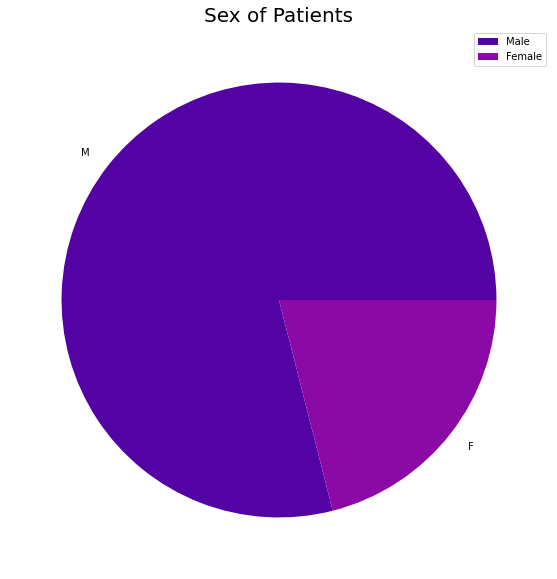

In [8]:
df['Sex'].value_counts()
sex = df['Sex'].value_counts()
f, ax = plt.subplots(figsize=(10,10))
chart1 = plt.pie(sex, labels = sex.index, colors = sns.color_palette("plasma"))
plt.title('Sex of Patients', fontsize=20)
plt.legend(['Male', 'Female'])

We can see that our data is male dominated and hence might produce biased results.

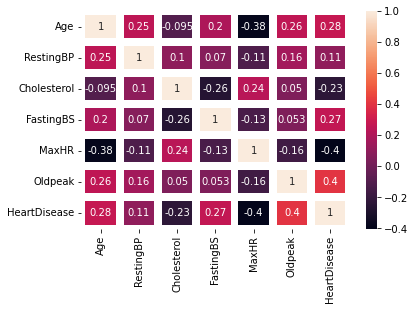

In [9]:
corr = df.corr()
sns.heatmap(corr, annot = True, linewidth=7)

Mean Age of patients: 53.510893246187365


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


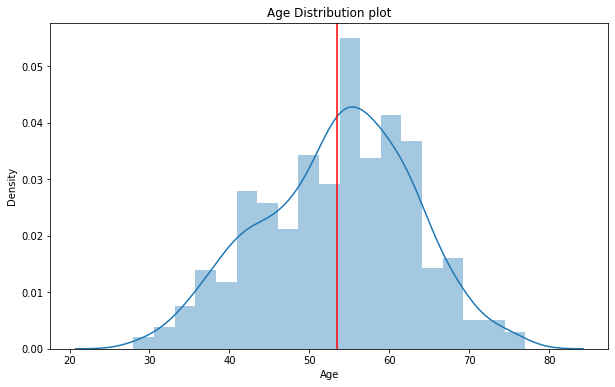

In [10]:
#Distribution plot 
Age_m = df['Age'].describe()
print('Mean Age of patients: {}'.format(Age_m['mean']))

plt.figure(figsize = (10, 6))
sns.distplot(df['Age'])
plt.title('Age Distribution plot')
plt.axvline(Age_m['mean'], linestyle = '-', color = "red")


We can see how the age is approximately normally distributed but is a little left skewed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Chest Pain Type')

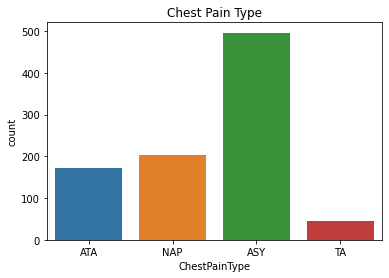

In [11]:
sns.countplot(df['ChestPainType'])
plt.title('Chest Pain Type')

 Most people experience ASY(Asymptomatic) Chest Pain Type followed by NAP(Non-Anginal Pain)

AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


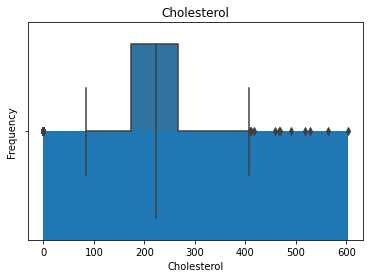

In [12]:
df['Cholesterol'].plot(kind = 'hist') 
plt.title('Cholesterol')
print(sns.boxplot(df["Cholesterol"]))

We see that there are values which are clearly outliers and hence needs to be removed.We remove values above 420.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


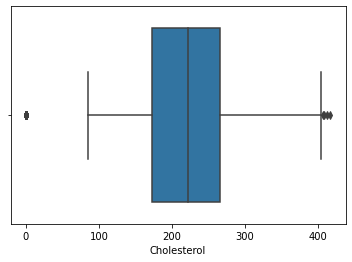

In [13]:
df.drop(df[df['Cholesterol'] > 420 ].index , axis = 0 , inplace = True)
sns.boxplot(df["Cholesterol"])

We can see that their our values which are outliers in the "Cholestrol" variable and need to be dealt with properly.

Text(0.5, 1.0, 'RestingBP')

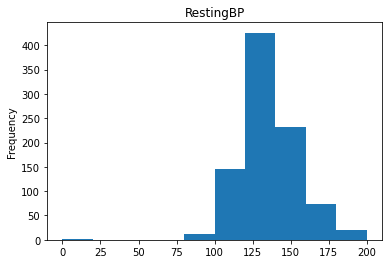

In [14]:
df['RestingBP'].plot(kind = 'hist') 
plt.title('RestingBP')

We see that value less than 80 is an outlier and affects distribution significantly. We will remove it.

Text(0.5, 1.0, 'RestingBP')

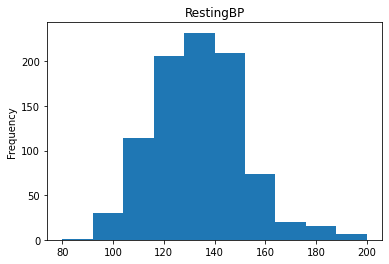

In [15]:
df.drop(df[df['RestingBP'] < 75].index , axis = 0 , inplace = True)
df['RestingBP'].plot(kind = 'hist') #
plt.title('RestingBP')

We remove the ones which are not logically or medically possible.

# Bivariate Analysis

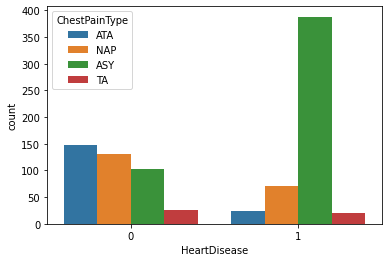

In [16]:
sns.countplot(data = df, x = 'HeartDisease' , hue = 'ChestPainType' );

We see that most people that have ASY chest pain have heart disease

[Text(0, 0.5, 'Age'), Text(0.5, 0, 'Count')]

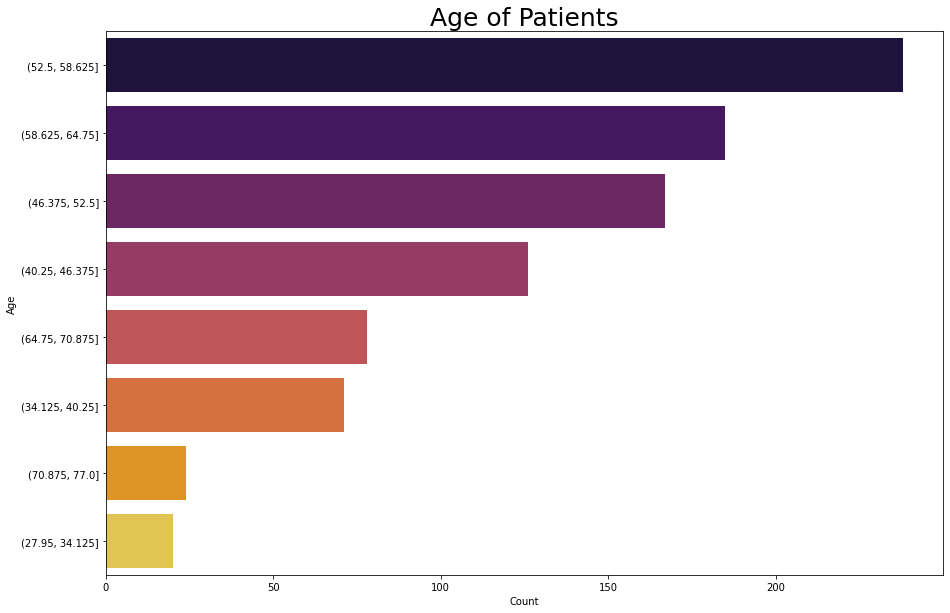

In [17]:
age_bin = df['Age'].value_counts(bins=8).sort_values(ascending=False)
plot1=plt.subplots(figsize=(15,10))
plot1 = sns.barplot(x=age_bin, y=age_bin.index, palette="inferno")
plt.title('Age of Patients', fontsize=25)
plot1.set(xlabel='Count', ylabel='Age')

Most patients are in late adulthood i.e between 52-65 (approx). The younger group 26-35 are the least affected.

[Text(0, 0.5, 'Cholesterol'), Text(0.5, 0, 'Count')]

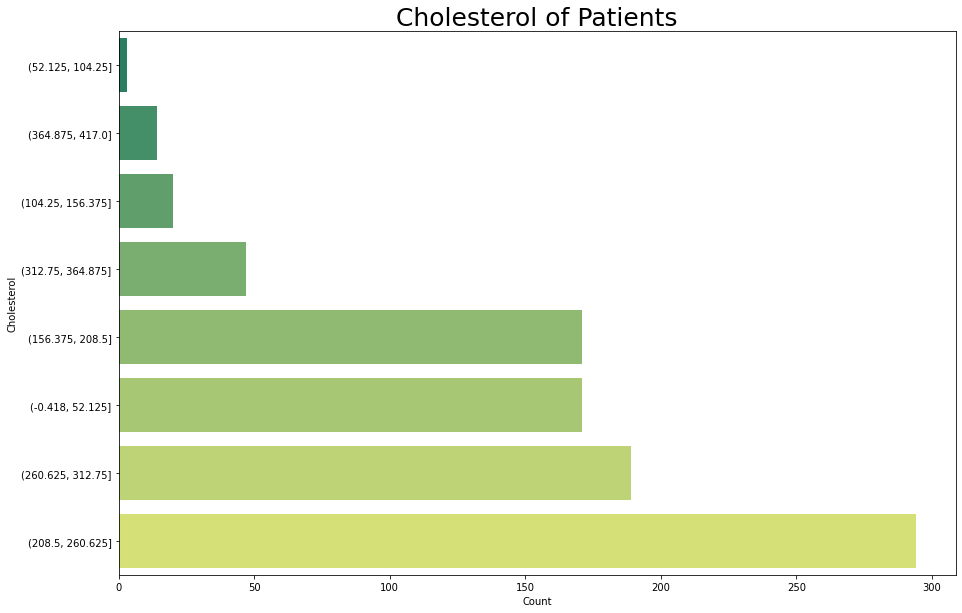

In [18]:
col_bin = df['Cholesterol'].value_counts(bins=8).sort_values(ascending=True)
plot1=plt.subplots(figsize=(15,10))
plot1 = sns.barplot(x=col_bin, y=col_bin.index, palette="summer")
plt.title('Cholesterol of Patients', fontsize=25)
plot1.set(xlabel='Count', ylabel='Cholesterol')

No. of patients are more with higher cholesterol levels.